In [41]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import numpy as np
from math import log
from CIoTS import *

In [43]:
dimensions = 3
max_p = 6
incoming_edges = 3

In [44]:
generator = CausalTSGenerator(dimensions=dimensions, max_p=max_p, data_length=10000, incoming_edges=incoming_edges)
ts = generator.generate()

In [45]:
_, graphs, times, bics = pc_incremental(partial_corr_test, ts, 0.05, 10, verbose=True)

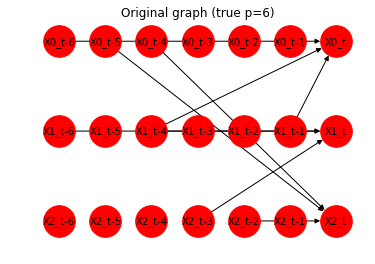

In [46]:
plt.title('Original graph (true p=6)')
generator.draw_graph()

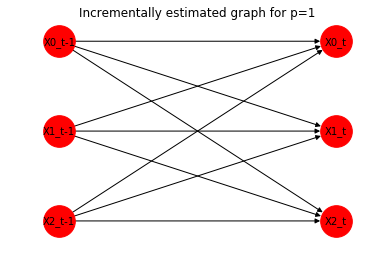

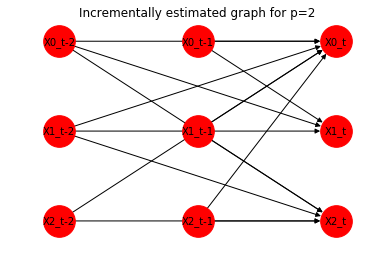

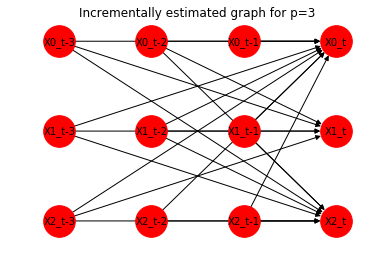

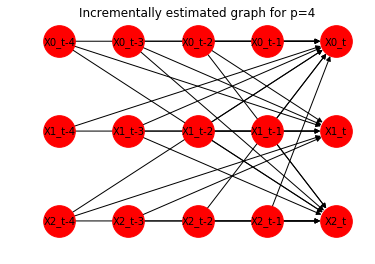

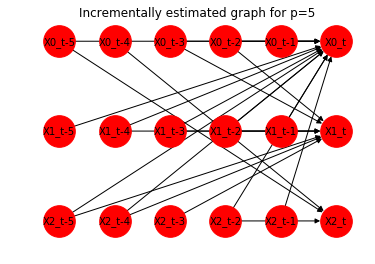

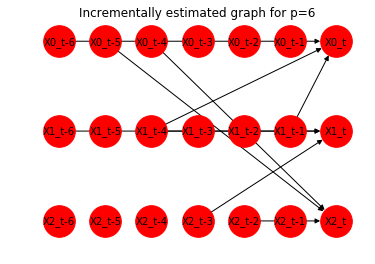

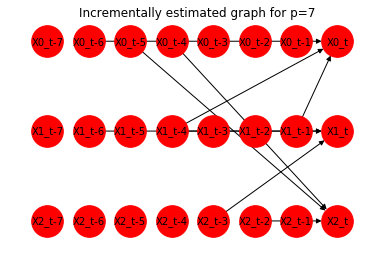

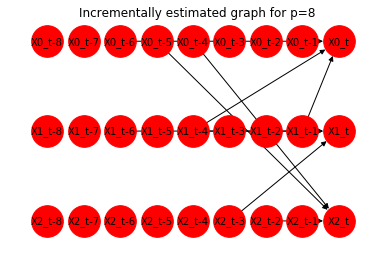

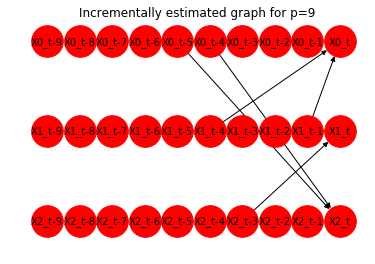

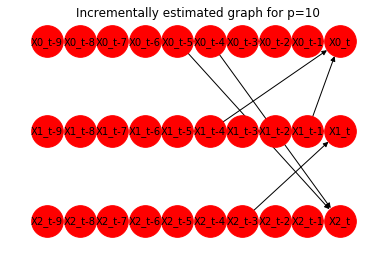

In [47]:
for p, g in graphs.items():   
    plt.title("Incrementally estimated graph for p="+str(p))
    draw_graph(g, dimensions, p)

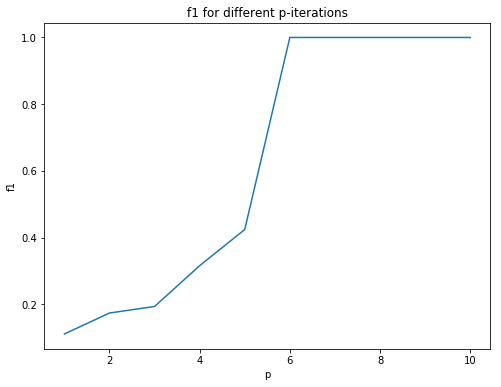

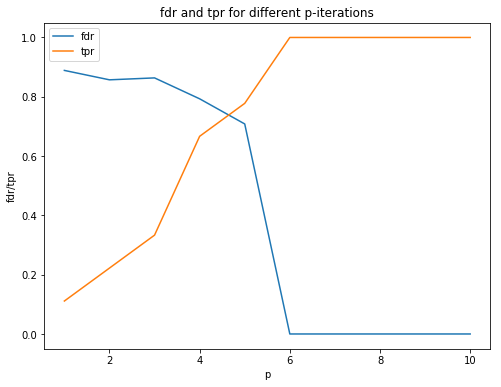

In [48]:
ps = []
f1 = []
fdr = []
tpr = []
for p, g in graphs.items():
    ps.append(p)
    f1.append(evaluate_edges(generator.graph, g)['f1-score'])
    fdr.append(evaluate_edges(generator.graph, g)['FDR'])
    tpr.append(evaluate_edges(generator.graph, g)['TPR'])

plt.figure(figsize=(8,6))
plt.title('f1 for different p-iterations')
plt.xlabel('p')
plt.ylabel('f1')
plt.plot(ps, f1)
plt.show()

plt.figure(figsize=(8,6))
plt.title('fdr and tpr for different p-iterations')
plt.xlabel('p')
plt.ylabel('fdr/tpr')
plt.plot(ps, fdr, label='fdr')
plt.plot(ps, tpr, label='tpr')
plt.legend()
plt.show()

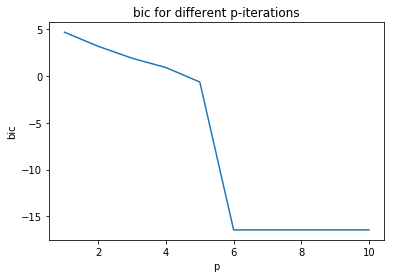

In [49]:
plt.title('bic for different p-iterations')
plt.xlabel('p')
plt.ylabel('bic')
plt.plot(list(bics.keys()), list(bics.values()))
plt.show()

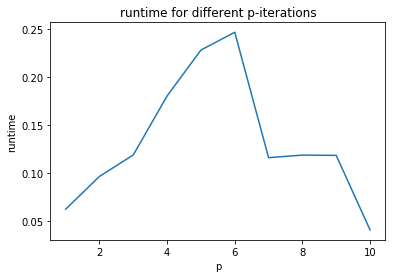

In [50]:
plt.title('runtime for different p-iterations')
plt.xlabel('p')
plt.ylabel('runtime')
plt.plot(list(times.keys()), list(times.values()))
plt.show()

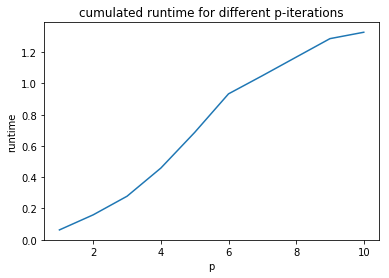

In [51]:
plt.title('cumulated runtime for different p-iterations')
plt.xlabel('p')
plt.ylabel('runtime')
plt.plot(list(times.keys()), np.cumsum(list(times.values())))
plt.show()

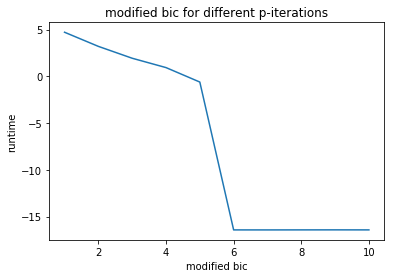

In [52]:
modified_bic = {}
for p, g in graphs.items():
    model = VAR(p)
    mapping, matrix = transform_ts(ts, p)
    model.fit_from_graph(3, matrix, g, mapping)
    free_params = len(g.nodes())+len(g.edges())
    modified_bic[p] = model.information_criterion('bic', free_params=free_params)
plt.title('modified bic for different p-iterations')
plt.xlabel('modified bic')
plt.ylabel('runtime')
plt.plot(list(modified_bic.keys()), list(modified_bic.values()))
plt.show()